In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gradiente import *

In [6]:
df = pd.read_csv('dados/training_data.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


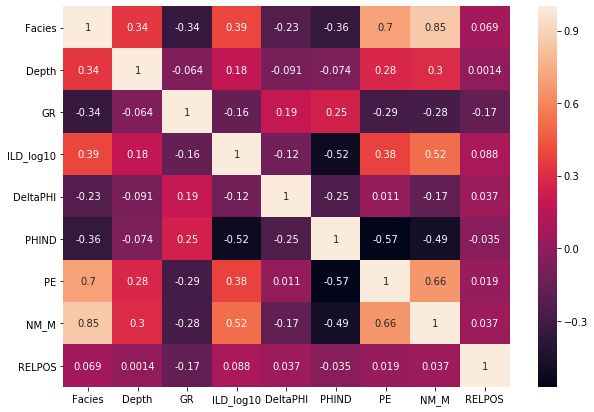

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

$$DeltaPhi = \phi_N - \phi_D$$

$$PHIND = \frac{\phi_N + \phi_D}{2}$$

$$\phi_N = \frac{DeltaPhi + 2 * PHIND}{2}$$

$$\phi_D = \frac{-DeltaPHi + 2 * PHIND}{2}$$ 

In [13]:
df['PHID'] = ((-df.DeltaPHI+2*df.PHIND)/2)
df['PHIN'] = ((df.DeltaPHI+2*df.PHIND)/2)

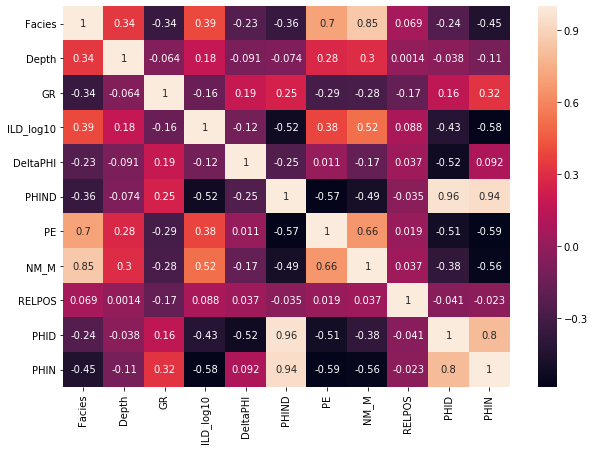

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,PHIN
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050


In [23]:
y = df.PHIN.values
X = df.ILD_log10.values

In [18]:
beta_ini = np.random.normal(size=2)

In [19]:
beta_ini

array([-0.09118809, -3.36129867])

### Regressão Linear entre PHIN(RILD)

In [36]:
beta_calc, cost_hist, beta_hist = gradient_descent(X,y,beta_ini,0.05,ninter=300)

In [37]:
beta_calc

array([-10.23715434,  21.63229437])

In [38]:
df['Phin_calc'] = predict(beta_calc,np.append(X.reshape(len(X),1),np.ones((len(X),1)),axis=1))

In [39]:
df.tail()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,PHIN,Phin_calc
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,6.3400,8.1680,11.937709
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,6.8925,9.1335,11.876286
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,6.5505,9.4755,11.763678
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,6.1665,9.2495,11.753440
3231,5,C LM,CHURCHMAN BIBLE,3122.5,50.031,0.970,2.609,6.668,3.295,2,0.653,5.3635,7.9725,11.702255


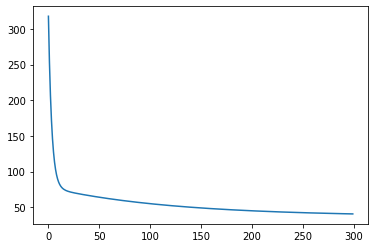

In [40]:
plt.plot(cost_hist)